# 体重データ分析

In [1]:
import pandas as pd
import datetime
import seaborn as sns
sns.set_style('darkgrid')

import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
def format_float(x):
    return round(x, 1)

In [3]:
WEIGHTS_PATH = "../data/all_weights.csv"
CALORIES_PATH = "../data/all_calories.csv"
HEALTHPLANETS_PATH = "../data/all_healthplanets.csv"
ACTIVITIES_PATH = "../data/all_activities.csv"

weights = pd.read_csv(WEIGHTS_PATH)
calories= pd.read_csv(CALORIES_PATH)
hps = pd.read_csv(HEALTHPLANETS_PATH)
activities = pd.read_csv(ACTIVITIES_PATH)
len(weights), len(calories), len(hps), len(activities)

(147, 86, 34, 132)

In [4]:
def func(x):
    try:
        return datetime.datetime.strptime(x.date, '%Y-%m-%d').strftime('%Y-%m-%d')
    except Exception:
        return datetime.datetime.strptime(x.date, '%Y-%m-%d %H:%M:%S').strftime('%Y-%m-%d')

weights['date_index'] = weights.apply(func, axis=1)
calories['date_index'] = calories.apply(func, axis=1)
hps['date_index'] = hps.apply(func, axis=1)
activities['date_index'] = activities.apply(func, axis=1)

weights['date_index'] = pd.to_datetime(weights.date_index)
calories['date_index'] = pd.to_datetime(calories.date_index)
hps['date_index'] = pd.to_datetime(hps.date_index)
activities['date_index'] = pd.to_datetime(activities.date_index)

weights = weights.set_index('date_index')
calories = calories.set_index('date_index')
hps = hps.set_index('date_index')
activities = activities.set_index('date_index')

weights.index.name = 'date'
calories.index.name = 'date'
hps.index.name = 'date'
activities.index.name = 'date'

weights = weights.drop(['date'], axis=1)
calories = calories.drop(['date'], axis=1)
hps = hps.drop(['date'], axis=1)
activities = activities.drop(['date'], axis=1)

In [5]:
weights = weights.groupby('date').mean()
hps = hps.groupby('date').mean()
activities = activities.groupby('date').sum()

In [6]:
df = pd.merge(weights, calories, how="outer", on="date")

hps = hps.drop(["weight"], axis=1)
df = pd.merge(df, hps, how="outer", on="date").sort_values('date')
df = pd.merge(df, activities, how="outer", on="date").sort_values('date')

len(df)

87

## データ分析

In [7]:
df["year"] = df.index.year
df["month"] = df.index.month
df["week_of_month"] = df.index.week
df["year_and_wom"] = df.index.strftime('%Y-W%W')

### 直近2週間

In [8]:
df_recent = pd.DataFrame()

In [9]:
df

,weight,bmi,fat,calory,calory_bmr,calory_activity,calory_out,calory_in,body_fat_parcentage,muscle_mass,...,body_age,estimated_bone_mass,calories,evaluation,duration,distance,year,month,week_of_month,year_and_wom
date,,,,,,,,,,,,,,,,,,,,,
2019-12-01,105.266667,35.996667,NaN,2232.0,1966.0,323.0,2289.0,2114.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,12,48,2019-W47
2019-12-02,105.200000,35.980000,NaN,2659.0,1960.0,976.0,2936.0,793.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,12,49,2019-W48
2019-12-03,104.200000,35.635000,NaN,2395.0,1946.0,606.0,2552.0,1123.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,12,49,2019-W48
2019-12-04,104.100000,35.600000,NaN,2474.0,1954.0,680.0,2634.0,1333.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,12,49,2019-W48
2019-12-05,104.000000,35.563333,NaN,2779.0,1952.0,1062.0,3014.0,1074.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2019,12,49,2019-W48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-23,93.166667,31.860000,31.533333,4149.0,1842.0,2739.0,4581.0,1056.0,31.533333,60.500000,...,45.666667,3.30,2681.0,322.0,434.8,37.9,2020,2,8,2020-W07
2020-02-24,92.800000,31.736667,31.666667,3978.0,1836.0,2579.0,4415.0,962.0,31.666667,60.133333,...,46.333333,3.30,2668.0,315.0,488.8,48.6,2020,2,9,2020-W08
2020-02-25,93.300000,31.905000,30.500000,2245.0,1842.0,444.0,2286.0,962.0,30.500000,61.500000,...,44.500000,3.35,262.0,13.0,37.8,7.0,2020,2,9,2020-W08


In [10]:
df_recent["体重"] = format_float(df["weight"])
# df_recent["BMI"] = format_float(df["bmi"])
df_recent["体脂肪率"] = format_float(df['body_fat_parcentage'])
df_recent["内臓脂肪"] = format_float(df['visceral_fat_level'])
df_recent["筋肉量"] = format_float(df["muscle_mass"])
df_recent["消費カロリー"] = df["calory"]
df_recent["摂取カロリー"] = df["calory_in"]
df_recent["運動カロリー"] = df["calory_activity"]
df_recent['サイクリング距離'] = df["distance"]
df_recent['サイクリング時間'] = round((df['duration'] / 60),1)

In [11]:
df_recent.tail(14)

,体重,体脂肪率,内臓脂肪,筋肉量,消費カロリー,摂取カロリー,運動カロリー,サイクリング距離,サイクリング時間
date,,,,,,,,,
2020-02-14,95.1,30.4,15.5,62.9,1707.0,172.0,0.0,NaN,NaN
2020-02-15,94.2,31.7,15.5,61.1,4393.0,1125.0,3013.0,39.4,7.2
2020-02-16,93.7,NaN,NaN,NaN,3489.0,1647.0,1882.0,16.5,4.0
2020-02-17,93.6,NaN,NaN,NaN,2241.0,968.0,376.0,NaN,NaN
2020-02-18,93.8,31.8,15.5,60.7,4182.0,1086.0,2764.0,36.9,7.2
2020-02-19,93.8,31.2,15.5,61.0,3045.0,1223.0,1336.0,19.9,1.7
2020-02-20,93.1,30.8,15.5,61.1,4616.0,1018.0,3269.0,48.4,6.7
2020-02-21,93.7,31.0,15.5,61.3,3531.0,1471.0,2025.0,22.9,2.4
2020-02-22,92.5,30.8,15.2,60.8,4905.0,1023.0,3572.0,33.8,6.9


### 週別の集計

In [12]:
groupby = df.groupby('year_and_wom')

In [13]:
df_by_week = pd.DataFrame()
df_by_week["体重"] = format_float(groupby["weight"].mean())
# df_by_week["BMI"] = format_float(groupby["bmi"].mean())
df_by_week["体脂肪率"] = format_float(groupby["body_fat_parcentage"].mean())
df_by_week["内臓脂肪"] = format_float(groupby['visceral_fat_level'].mean())
df_by_week["筋肉量"] = format_float(groupby["muscle_mass"].mean())

In [14]:
df_by_week["消費カロリー"] = format_float(groupby["calory"].mean()) * 7
df_by_week["摂取カロリー"] = format_float(groupby["calory_in"].mean()) * 7
df_by_week["カロリー増減"] = (format_float(groupby["calory_in"].mean()) - format_float(groupby["calory"].mean())) * 7
df_by_week["運動カロリー"] = format_float(groupby["calory_activity"].mean()) * 7

In [15]:
df_by_week['サイクリング距離'] = groupby["distance"].sum()
df_by_week['サイクリング時間'] = format_float((groupby['duration']).sum()/60)

In [16]:
df_by_week["増減"] = df_by_week.diff()["体重"]
df_by_week["総減量"] = 106 - df_by_week["体重"]

In [17]:
df_by_week["週番号"] = df_by_week.index
df_by_week["date"] = df_by_week["週番号"].apply(lambda x: datetime.datetime.strptime(x + '-0', "%Y-W%W-%w"))
df_by_week.set_index("date", inplace=True)

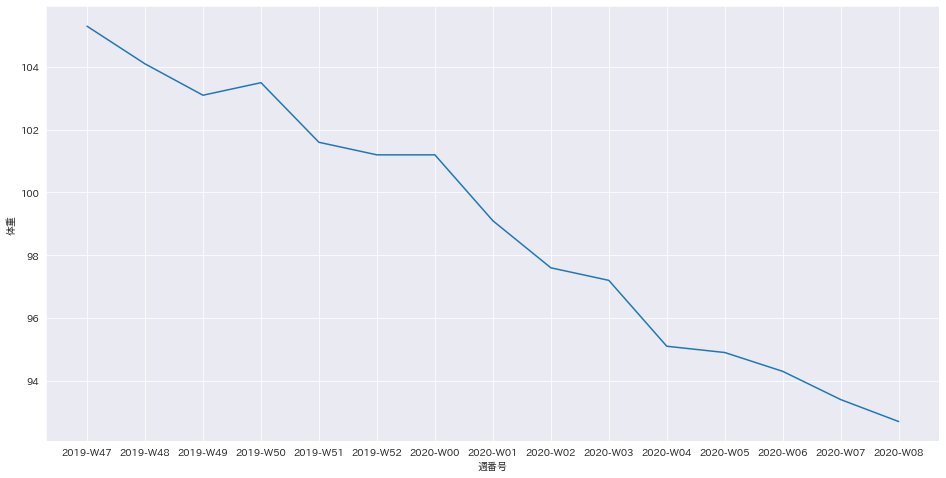

In [18]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=df_by_week, x='週番号', y='体重')

In [19]:
df_by_week.drop(["週番号"], axis=1, inplace=True)
df_by_week.index.name = '週別'

In [20]:
df_by_week = df_by_week.groupby("週別").mean()

In [21]:
df_by_week.tail(10)

,体重,体脂肪率,内臓脂肪,筋肉量,消費カロリー,摂取カロリー,カロリー増減,運動カロリー,サイクリング距離,サイクリング時間,増減,総減量
週別,,,,,,,,,,,,
2019-12-29,101.6,NaN,NaN,NaN,27458.90,0.0,-27458.90,15866.9,124.80,29.50,-1.9,4.4
2020-01-05,101.2,NaN,NaN,NaN,21579.25,0.0,-21579.25,9462.6,27.65,6.45,-0.2,4.8
2020-01-12,99.1,NaN,NaN,NaN,25256.00,1057.0,-24199.00,14153.3,142.60,37.80,-2.1,6.9
2020-01-19,97.6,NaN,NaN,NaN,28797.30,7693.0,-21104.30,18718.7,194.70,37.20,-1.5,8.4
2020-01-26,97.2,NaN,NaN,NaN,26156.90,8806.0,-17350.90,15303.4,112.20,24.10,-0.4,8.8
2020-02-02,95.1,31.9,15.6,61.2,26576.20,6472.2,-20104.00,15955.8,156.10,30.50,-2.1,10.9
2020-02-09,94.9,32.3,15.7,61.1,22120.00,7339.5,-14780.50,11114.6,91.50,19.90,-0.2,11.1
2020-02-16,94.3,31.0,15.5,62.0,23944.90,7551.6,-16393.30,13111.0,146.50,26.30,-0.6,11.7
2020-02-23,93.4,31.2,15.5,60.9,26669.30,7844.9,-18824.40,16081.1,199.80,32.20,-0.9,12.6


## バーンダウンチャート

In [22]:
planA = -0.9
planB = -0.6
planC = -1.2
start_weight = 105.3

In [23]:
bd_df = df_by_week[["体重", "増減"]].copy()

In [24]:
planA_weight = start_weight
planB_weight = start_weight
planC_weight = start_weight


for i, item in bd_df.iterrows():
    planA_weight = planA_weight + planA
    bd_df.loc[i, "planA"] = planA_weight
    
    planB_weight = planB_weight + planB
    bd_df.loc[i, "planB"] = planB_weight
    
    planC_weight = planC_weight + planC
    bd_df.loc[i, "planC"] = planC_weight
    
bd_df.rename(columns = {"体重": "実績"}, inplace=True)

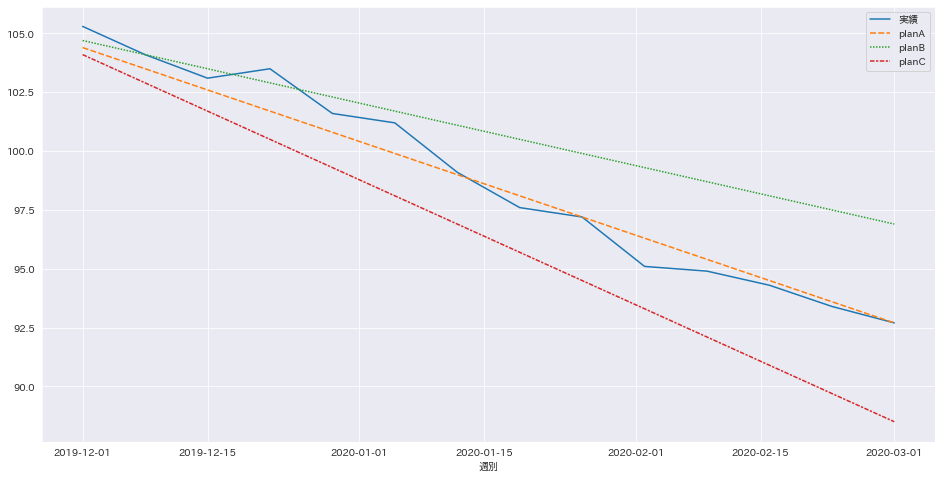

In [25]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(16,8))
sns.lineplot(data=bd_df.drop("増減", axis=1))

In [26]:
bd_df

,実績,増減,planA,planB,planC
週別,,,,,
2019-12-01,105.3,NaN,104.4,104.7,104.1
2019-12-08,104.1,-1.2,103.5,104.1,102.9
2019-12-15,103.1,-1.0,102.6,103.5,101.7
2019-12-22,103.5,0.4,101.7,102.9,100.5
2019-12-29,101.6,-1.9,100.8,102.3,99.3
2020-01-05,101.2,-0.2,99.9,101.7,98.1
2020-01-12,99.1,-2.1,99.0,101.1,96.9
2020-01-19,97.6,-1.5,98.1,100.5,95.7
2020-01-26,97.2,-0.4,97.2,99.9,94.5


## これからの体重予測

In [27]:
start_weight = round(weights.iloc[-1, 0], 1)

predict_df = pd.DataFrame()
index_date = datetime.datetime.today()

weightA = start_weight
weightB = start_weight
weightC = start_weight


for i in range(32):
    index_date += datetime.timedelta(days=7)
    weightA += planA
    weightB += planB
    weightC += planC
    index_f = index_date.strftime("%Y-%m-%d")
    predict_df.loc[index_f, "planA"] = weightA
    predict_df.loc[index_f, "planB"] = weightB
    predict_df.loc[index_f, "planC"] = weightC

In [28]:
predict_df

,planA,planB,planC
2020-03-06,91.2,91.5,90.9
2020-03-13,90.3,90.9,89.7
2020-03-20,89.4,90.3,88.5
2020-03-27,88.5,89.7,87.3
2020-04-03,87.6,89.1,86.1
2020-04-10,86.7,88.5,84.9
2020-04-17,85.8,87.9,83.7
2020-04-24,84.9,87.3,82.5
2020-05-01,84.0,86.7,81.3
2020-05-08,83.1,86.1,80.1
